In [15]:
import sys
import os
import pandas as pd
import numpy as np
import pickle
from metrics import find_best_metrics

In [16]:
!ls ../mmdetection  

build	 LICENSE	 README.md	   tools	    work_dirs
configs  mmdet		 requirements	   val_ann_2.pkl
demo	 mmdet.egg-info  requirements.txt  val_ann.pkl
docker	 pretrained	 setup.py	   val_preds_2.pkl
docs	 pytest.ini	 tests		   val_preds.pkl


In [17]:
anns = pickle.load(open('../mmdetection/val_ann_2.pkl', 'rb'))

In [18]:
len(anns)

734

In [20]:
preds = pickle.load(open('../mmdetection/val_preds_2.pkl', 'rb'))

In [21]:
len(preds)

734

In [28]:
def get_all_preds(preds, anns):
    all_preds = []
    for p, gt in zip(preds, anns):
        det = {
            'pred_boxes': (p[1][:, :4]).clip(min=0, max=1023).astype(int),
            'scores': p[1][:, 4].astype(np.float32),
            'gt_boxes': gt['ann']['bboxes'],
            'image_id': gt['filename'],
            'labels': gt['ann']['labels'],
            'source': gt['ann']['source']
        }
        all_preds.append(det)
    return all_preds

In [29]:
all_preds = get_all_preds(preds, anns)

In [30]:
all_preds[0]

{'pred_boxes': array([[ 918,    0, 1020,   37],
        [ 798,  350,  889,  471],
        [   2,  379,   75,  437],
        [ 805,  880,  896,  957],
        [ 860,  298,  957,  355],
        [ 239,  700,  329,  745],
        [ 709,  960,  799, 1023],
        [ 756,   16,  839,   65],
        [ 943,   39, 1022,   83],
        [ 524,  860,  582,  919],
        [ 347,  710,  435,  758],
        [ 456,  905,  511,  989],
        [ 109,  814,  168,  880],
        [  74,  768,  147,  813],
        [ 815,  717,  934,  770],
        [ 712,   85,  781,  133],
        [  70,  197,  136,  267],
        [ 598,  261,  668,  310],
        [ 348,  778,  462,  824],
        [ 360,  828,  436,  892],
        [ 225,  214,  289,  253],
        [ 497,  183,  583,  235],
        [ 228,  973,  289, 1023],
        [  25,  149,   63,  198],
        [ 635,  759,  711,  820],
        [ 668,  250,  753,  306],
        [ 934,  246, 1018,  286],
        [ 125,  908,  167,  981],
        [ 827,  648,  908,  697],


In [31]:
find_best_metrics(all_preds)

{'best_score': 0.72081,
 'best_threshold': 0.52,
 0.3: 0.71311,
 0.37: 0.71821,
 0.4: 0.71961,
 0.42: 0.71945,
 0.45: 0.72005,
 0.5: 0.72069,
 0.55: 0.71976,
 0.6: 0.71831}

In [5]:
test_preds = pickle.load(open('../mmdetection/work_dirs/preds_23.pkl', 'rb'))

In [28]:
test_preds[0]

[array([], shape=(0, 5), dtype=float32),
 array([[7.97785706e+02, 3.52082703e+02, 8.87876892e+02, 4.71407227e+02,
         9.87723947e-01],
        [9.21752014e+02, 0.00000000e+00, 1.01995026e+03, 3.52646942e+01,
         9.73274589e-01],
        [3.24725723e+00, 3.81274902e+02, 7.21055145e+01, 4.37417725e+02,
         9.65280592e-01],
        [8.06280029e+02, 8.79851257e+02, 8.96782349e+02, 9.57104187e+02,
         9.60636914e-01],
        [8.16724487e+02, 7.15706299e+02, 9.40709839e+02, 7.71124390e+02,
         9.51370656e-01],
        [7.12130981e+02, 9.64114563e+02, 7.99608765e+02, 1.02363556e+03,
         9.50612724e-01],
        [9.49549255e+02, 4.03648529e+01, 1.02263788e+03, 8.21241531e+01,
         9.44433987e-01],
        [4.60858704e+02, 9.05147522e+02, 5.08563721e+02, 9.92227722e+02,
         9.37116325e-01],
        [1.09774841e+02, 8.12453125e+02, 1.68465057e+02, 8.80022827e+02,
         9.37033653e-01],
        [8.65449646e+02, 3.00292114e+02, 9.51648010e+02, 3.50356934e

In [6]:
all_preds2 = get_all_preds(test_preds, anns)

In [8]:
find_best_metrics(all_preds2)

{'best_score': 0.70536,
 'best_threshold': 0.47,
 0.3: 0.69999,
 0.37: 0.70284,
 0.4: 0.70385,
 0.42: 0.70439,
 0.45: 0.70533,
 0.5: 0.7046,
 0.55: 0.70349,
 0.6: 0.70216}

In [31]:
all_preds2[0]

{'pred_boxes': array([[ 797,  352,  887,  471],
        [ 921,    0, 1019,   35],
        [   3,  381,   72,  437],
        [ 806,  879,  896,  957],
        [ 816,  715,  940,  771],
        [ 712,  964,  799, 1023],
        [ 949,   40, 1022,   82],
        [ 460,  905,  508,  992],
        [ 109,  812,  168,  880],
        [ 865,  300,  951,  350],
        [ 523,  861,  582,  921],
        [  71,  200,  134,  269],
        [ 361,  829,  435,  893],
        [ 352,  780,  459,  820],
        [ 712,   87,  782,  131],
        [ 598,  262,  666,  311],
        [  21,  960,   75, 1022],
        [ 830,  645,  907,  697],
        [ 237,  701,  330,  743],
        [ 757,   20,  833,   61],
        [ 349,  712,  434,  757],
        [  25,  148,   62,  199],
        [ 935,  244, 1018,  288],
        [ 320,    3,  372,   55],
        [  76,  770,  142,  814],
        [ 231,  974,  285, 1023],
        [ 303,  862,  357,  924],
        [ 354,  662,  408,  704],
        [ 278,   66,  328,  117],


In [12]:
import matplotlib.pyplot as plt
import cv2
DATA_DIR = '/relevance2-nfs/chec/data/wheat'

In [13]:
def get_img_bboxes(preds, idx):
    image_id = preds[idx]['image_id']
    fn = f'{DATA_DIR}/train/{image_id}'
    img = cv2.imread(fn)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    bboxes = preds[idx]['pred_boxes']
    
    return img, bboxes

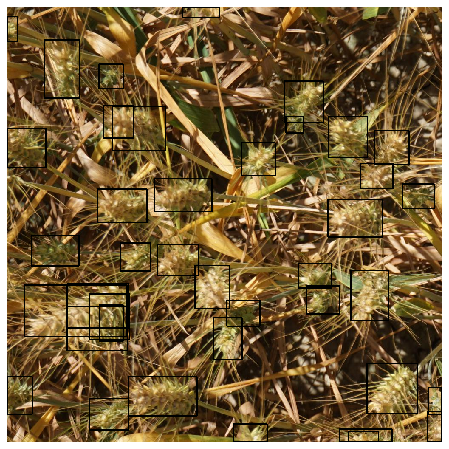

In [14]:


#image, target, image_id = train_dataset[0]
#boxes = target['boxes'].cpu().numpy().astype(np.int32)

#numpy_image = image.permute(1,2,0).cpu().numpy()

numpy_image, boxes = get_img_bboxes(all_preds2, 1)

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
    cv2.rectangle(numpy_image, (box[0], box[1]), (box[2],  box[3]), (0, 1, 0), 2)
    
ax.set_axis_off()
ax.imshow(numpy_image);

In [32]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
from mmcv import Config
from mmdet.models import build_detector
from mmcv.runner import load_checkpoint
from mmcv.parallel import MMDataParallel
from mmdet.apis import single_gpu_test
from mmdet.datasets import build_dataloader, build_dataset

import pandas as pd
import os
import json

from PIL import Image

import torch

In [149]:
config_file = '../mmdetection/configs/wheat/cascade_rcnn_r101_fpn_dconv_c3-c5_1x_coco.py'
cfg = Config.fromfile(config_file)
cfg.data.val.test_mode = True
distributed = False

In [150]:
cfg.test_cfg

{'rpn': {'nms_across_levels': False,
  'nms_pre': 1000,
  'nms_post': 1000,
  'max_num': 1000,
  'nms_thr': 0.7,
  'min_bbox_size': 0},
 'rcnn': {'score_thr': 0.05,
  'nms': {'type': 'nms', 'iou_thr': 0.5},
  'max_per_img': 100}}

In [151]:
#cfg.test_cfg['max_per_img'] = 200
#cfg.test_cfg['max_per_img'] = 200
#cfg.test_cfg['rcnn']['nms']['iou_thr'] = 0.4
cfg.test_cfg['min_bbox_size'] = 20

In [152]:
dataset = build_dataset(cfg.data.val)
data_loader = build_dataloader(
    dataset,
    samples_per_gpu=1,
    workers_per_gpu=1,
    dist=distributed,
    shuffle=False)

/home/core/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [153]:
!ls ..

mmdet_config_weight  mmdetection  notebooks  README.md	weightedboxesfusion


In [154]:
cfg.model['pretrained'] = None
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
WEIGHTS_FILE = '../mmdet_config_weight/epoch_23.pth'
model = build_detector(cfg.model, train_cfg=None, test_cfg=cfg.test_cfg)
checkpoint = load_checkpoint(model, WEIGHTS_FILE, map_location='cpu')

In [155]:
model = MMDataParallel(model, device_ids=[0])

In [156]:
from tqdm.notebook import tqdm
model.eval()
results = []
with torch.no_grad():
    for data in tqdm(data_loader):
        outputs = model(return_loss=False, rescale=True, **data)
        #print(len(outputs))
        results.append(outputs)

>>>>>>> 734 val


>>>>>>> 734 val



In [157]:
results[3]

[array([], shape=(0, 5), dtype=float32),
 array([[6.12125732e+02, 7.31154175e+02, 7.52198608e+02, 8.14931396e+02,
         9.96731997e-01],
        [6.50113403e+02, 9.97760773e-01, 7.33989014e+02, 7.42629852e+01,
         9.96499419e-01],
        [6.50746033e+02, 1.24281837e+02, 7.41688660e+02, 1.90080688e+02,
         9.96302843e-01],
        [4.30113678e+02, 3.79843781e+02, 5.29945862e+02, 4.59982086e+02,
         9.95978594e-01],
        [7.52316345e+02, 3.64704651e+02, 8.52173157e+02, 4.41789307e+02,
         9.95414972e-01],
        [2.44299637e+02, 4.39216003e+02, 3.35769165e+02, 5.31383179e+02,
         9.95324373e-01],
        [3.29878326e+02, 3.15890884e+01, 4.13833527e+02, 1.18244133e+02,
         9.95121539e-01],
        [4.68646423e+02, 6.67039307e+02, 5.85740784e+02, 7.50061401e+02,
         9.93029416e-01],
        [4.85123779e+02, 2.65598206e+02, 5.65382812e+02, 3.32506531e+02,
         9.92893517e-01],
        [8.99309235e+01, 1.30960999e+02, 1.76077805e+02, 2.07071503e

In [158]:
dataset.data_infos

[{'filename': '00ea5e5ee.jpg',
  'width': 1024,
  'height': 1024,
  'ann': {'bboxes': array([[ 327.,    3.,  362.,   52.],
          [ 928.,    0., 1018.,   38.],
          [ 952.,   38., 1021.,   82.],
          [ 994.,   82., 1024.,  136.],
          [ 921.,  174.,  993.,  202.],
          [ 937.,  243., 1008.,  284.],
          [ 973.,  318., 1024.,  357.],
          [ 871.,  297.,  954.,  353.],
          [ 793.,  349.,  887.,  468.],
          [ 726.,  237.,  790.,  271.],
          [ 713.,   89.,  775.,  128.],
          [ 760.,   17.,  839.,   60.],
          [ 784.,  201.,  825.,  240.],
          [ 668.,  249.,  751.,  307.],
          [ 606.,  266.,  685.,  311.],
          [ 512.,  189.,  590.,  238.],
          [ 429.,  107.,  480.,  158.],
          [ 498.,   60.,  548.,  110.],
          [ 283.,   75.,  325.,  123.],
          [ 378.,  285.,  424.,  327.],
          [ 224.,  214.,  285.,  247.],
          [ 271.,  258.,  310.,  308.],
          [  83.,  195.,  124.,  263.

In [159]:
all_preds = get_all_preds(results, anns)
eval_metrics(all_preds, by_source=True)

{'best_score': 0.71895, 'best_threshold': 0.57, 0.3: 0.71185, 0.37: 0.7145, 0.4: 0.71544, 0.42: 0.71731, 0.45: 0.71819, 0.5: 0.71751, 0.55: 0.71784, 0.6: 0.71796}


{'best_score': 0.71895,
 'best_threshold': 0.57,
 0.3: 0.71185,
 0.37: 0.7145,
 0.4: 0.71544,
 0.42: 0.71731,
 0.45: 0.71819,
 0.5: 0.71751,
 0.55: 0.71784,
 0.6: 0.71796,
 'arvalis_1': {'score': 0.63004,
  'num': 212,
  'best_score': 0.6332,
  'best_threshold': 0.37},
 'arvalis_2': {'score': 0.57712,
  'num': 43,
  'best_score': 0.58242,
  'best_threshold': 0.72},
 'arvalis_3': {'score': 0.69771,
  'num': 113,
  'best_score': 0.70032,
  'best_threshold': 0.49},
 'ethz_1': {'score': 0.75895,
  'num': 151,
  'best_score': 0.76324,
  'best_threshold': 0.44},
 'rres_1': {'score': 0.82328,
  'num': 87,
  'best_score': 0.82498,
  'best_threshold': 0.63},
 'usask_1': {'score': 0.66477,
  'num': 42,
  'best_score': 0.67436,
  'best_threshold': 0.41},
 'inrae_1': {'score': 0.81998,
  'num': 37,
  'best_score': 0.8255,
  'best_threshold': 0.65},
 'unknown': {'score': 0.93878,
  'num': 49,
  'best_score': 1.0,
  'best_threshold': 0.95}}

In [85]:
from metrics import calculate_final_score
def eval_metrics(all_predictions, by_source=False):
    #all_predictions = predict_eval_set(model, validation_loader, imsize)
    all_metrics = find_best_metrics(all_predictions)
    
    print(all_metrics)
    
    if not by_source:
        return all_metrics
    
    metrics = {}
    metrics.update(all_metrics)
    def get_preds_by_source(preds, src):
        results = []
        for p in preds:
            if p['source'] == src:
                results.append(p)
        return results
    
    for source in ['arvalis_1', 'arvalis_2', 'arvalis_3', 'ethz_1', 'rres_1', 'usask_1', 'inrae_1', 'unknown']:
        preds = get_preds_by_source(all_predictions, source)
        source_metrics = find_best_metrics(preds)
        metrics[source] = {
            'score': round(calculate_final_score(preds, all_metrics['best_threshold']), 5), #find_best_metrics(preds)
            'num': len(preds),
            'best_score': source_metrics['best_score'],
            'best_threshold': source_metrics['best_threshold']
        }

    return metrics

In [76]:
eval_metrics(all_preds, by_source=True)

{'best_score': 0.71895,
 'best_threshold': 0.57,
 0.3: 0.71185,
 0.37: 0.7145,
 0.4: 0.71544,
 0.42: 0.71731,
 0.45: 0.71819,
 0.5: 0.71751,
 0.55: 0.71784,
 0.6: 0.71796,
 'arvalis_1': {'score': 0.63004,
  'num': 212,
  'best_score': 0.6332,
  'best_threshold': 0.37},
 'arvalis_2': {'score': 0.57712,
  'num': 43,
  'best_score': 0.58242,
  'best_threshold': 0.72},
 'arvalis_3': {'score': 0.69771,
  'num': 113,
  'best_score': 0.70032,
  'best_threshold': 0.49},
 'ethz_1': {'score': 0.75895,
  'num': 151,
  'best_score': 0.76324,
  'best_threshold': 0.44},
 'rres_1': {'score': 0.82328,
  'num': 87,
  'best_score': 0.82498,
  'best_threshold': 0.63},
 'usask_1': {'score': 0.66477,
  'num': 42,
  'best_score': 0.67436,
  'best_threshold': 0.41},
 'inrae_1': {'score': 0.81998,
  'num': 37,
  'best_score': 0.8255,
  'best_threshold': 0.65},
 'unknown': {'score': 0.93878,
  'num': 49,
  'best_score': 1.0,
  'best_threshold': 0.95}}